# **🍷 Wine 데이터 분류 - 딥러닝 실습**

## ✅ 1. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

## ✅ 2. 데이터 로드 및 확인

In [2]:
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/wine.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()

(178, 14)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## ✅ 3. 상관관계 분석 (히트맵)

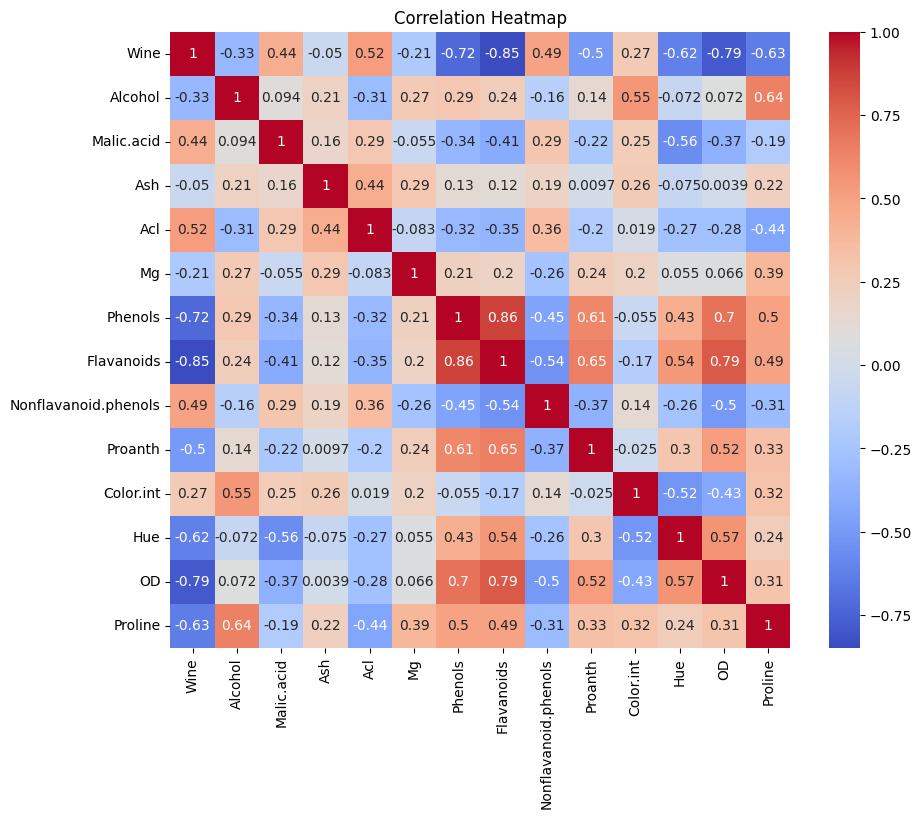

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## ✅ 4. 데이터 전처리

**🎯 ① 입력(X)과 타깃(y) 분리**

In [4]:
X = df.drop("Wine", axis=1)
y = df["Wine"]

**🎯 ② 타깃을 One-hot 인코딩**

In [5]:
Y = pd.get_dummies(y).values

**🎯 ③ 데이터 정규화 (스케일링)**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**🎯 ④ 학습 / 테스트 데이터 분리**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(142, 13) (142, 3) (36, 13) (36, 3)


## ✅ 5. 모델 구성 및 학습

**🧠 모델 정의**

In [8]:
model = Sequential()
model.add(Dense(13, input_shape=(13,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 다중 클래스 → softmax 사용

**⚙️ 컴파일**

In [9]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 30)                420       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1,625
Trainable params: 1,625
Non-trainable params: 0
_________________________________________________________________


**📈 학습**

In [10]:
N_EPOCHS = 20
history = model.fit(X_train, y_train, 
                    epochs=N_EPOCHS, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

Epoch 1/20
5/5 [==============================] - 0s 24ms/step - loss: 0.9632 - accuracy: 0.5634 - val_loss: 0.9293 - val_accuracy: 0.6389
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 0.8919 - accuracy: 0.6690 - val_loss: 0.8575 - val_accuracy: 0.7222
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 0.8304 - accuracy: 0.7254 - val_loss: 0.7922 - val_accuracy: 0.7500
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7753 - accuracy: 0.7817 - val_loss: 0.7304 - val_accuracy: 0.8056
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.7224 - accuracy: 0.8028 - val_loss: 0.6710 - val_accuracy: 0.8056
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.8099 - val_loss: 0.6165 - val_accuracy: 0.8056
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.8310 - val_loss: 0.5646 - val_accuracy: 0.8333
Epoch 8/20
5/5 [=================

## ✅ 6. 학습 결과 시각화

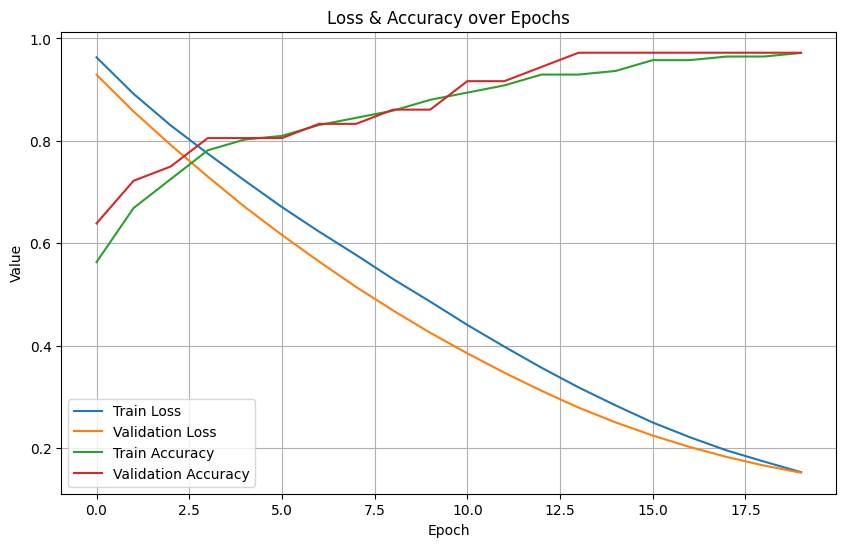

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title("Loss & Accuracy over Epochs")
plt.grid()
plt.show()

## ✅ 7. 모델 평가

In [12]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

2/2 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9722
Test Accuracy: 0.9722


## ✅ 8. Confusion Matrix & Classification Report 추가

**🧪 예측 결과 생성**

In [13]:
# 예측 확률을 가장 높은 인덱스로 변환 (클래스 예측)
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # 예측 클래스
y_true = np.argmax(y_test, axis=1)               # 실제 클래스

2/2 [==============================] - 0s 757us/step


**📊 Confusion Matrix 시각화**

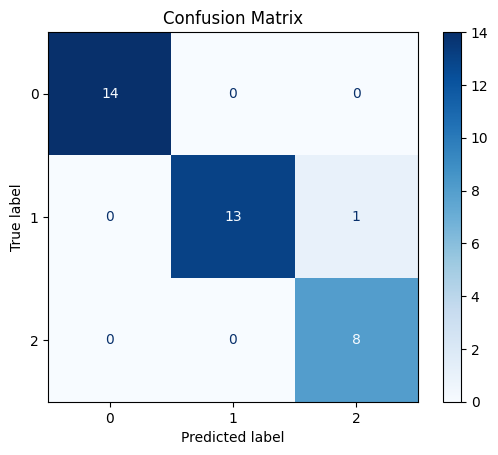

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**📝 Classification Report**

In [15]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



# **✅ 하이퍼파라미터 튜닝 실습 (와인 데이터 딥러닝 분류)**
**🔧 튜닝할 주요 하이퍼파라미터**
- epochs: 학습 반복 횟수
- batch_size: 학습 시 한 번에 사용하는 샘플 수
- optimizer: 가중치 갱신 방법 (SGD, Adam, RMSprop 등)
- activation function: 은닉층에서 사용하는 함수
- hidden layers: 은닉층 개수와 뉴런 수

## **🧪 실험 1: 하이퍼파라미터 조합**

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))  # 뉴런 수 증가
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 다중 클래스 분류이므로 softmax

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

N_EPOCHS = 30
BATCH_SIZE = 16

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 0s 11ms/step - loss: 0.9283 - accuracy: 0.5563 - val_loss: 0.8013 - val_accuracy: 0.7500
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.8873 - val_loss: 0.5713 - val_accuracy: 0.9722
Epoch 3/30
9/9 [=======================

### 📉 학습 곡선 확인

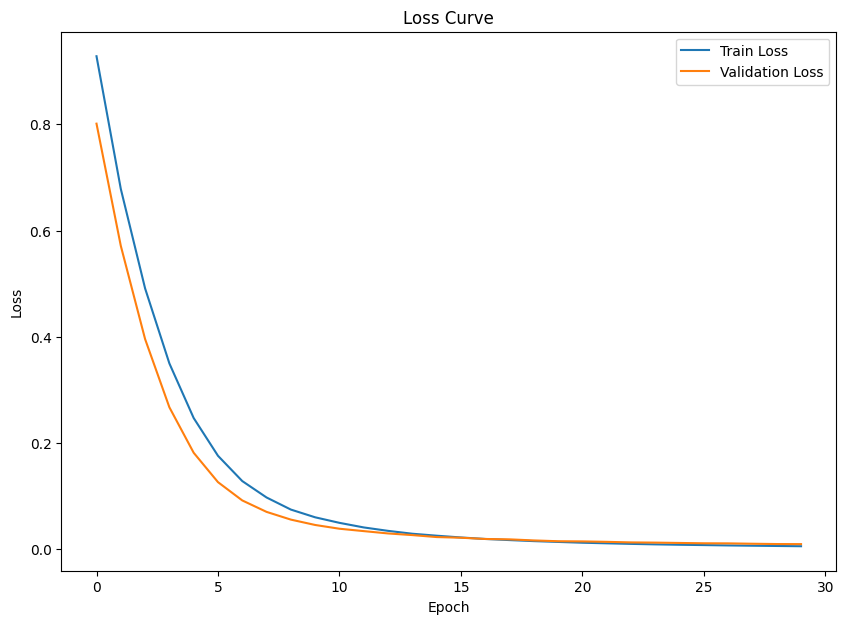

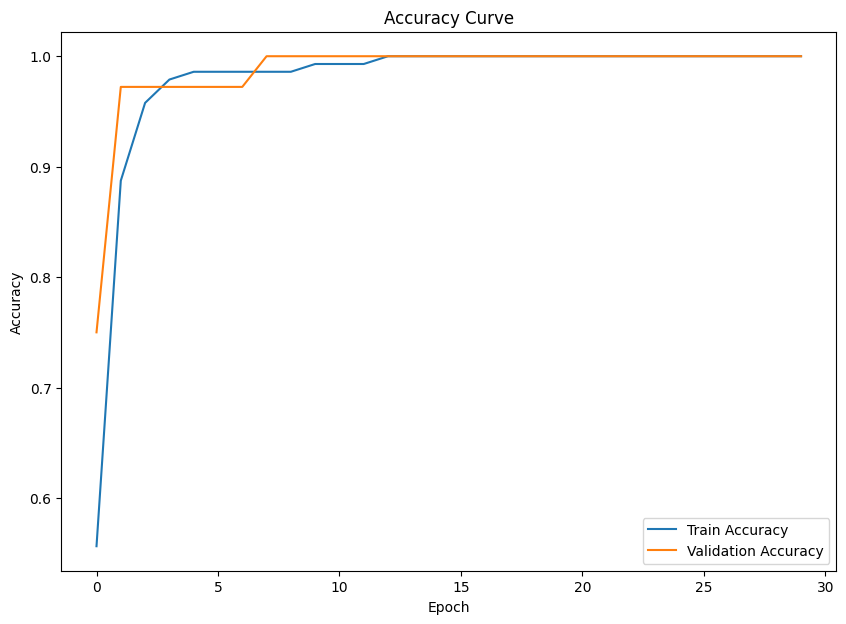

In [17]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### 📊 성능 평가 (confusion matrix & classification report)

2/2 [==============================] - 0s 1ms/step


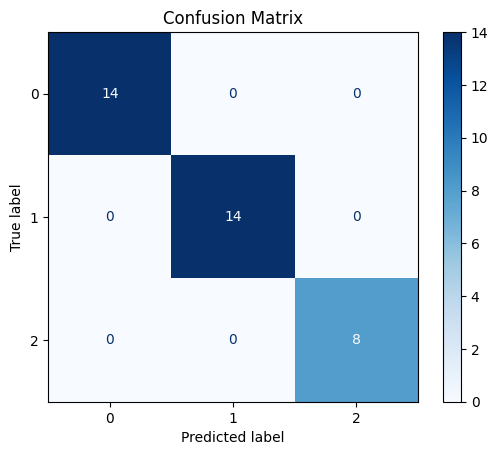

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [18]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 실험 1 예측 결과 저장
y_test_1 = y_true
y_pred_1 = y_pred_classes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

## **🧪 실험 2: Optimizer = SGD, Activation = tanh**

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

N_EPOCHS = 30
BATCH_SIZE = 16

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                896       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 0s 10ms/step - loss: 1.1433 - accuracy: 0.3592 - val_loss: 0.8885 - val_accuracy: 0.6944
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 0.8020 - accuracy: 0.7324 - val_loss: 0.6238 - val_accuracy: 0.8889
Epoch 3/30
9/9 [=======================

### 📉 학습 곡선 확인

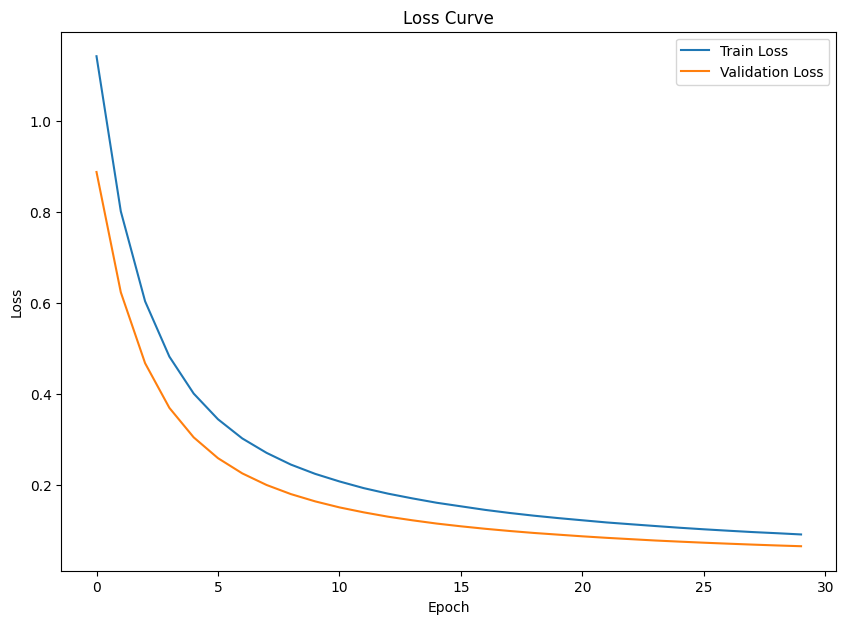

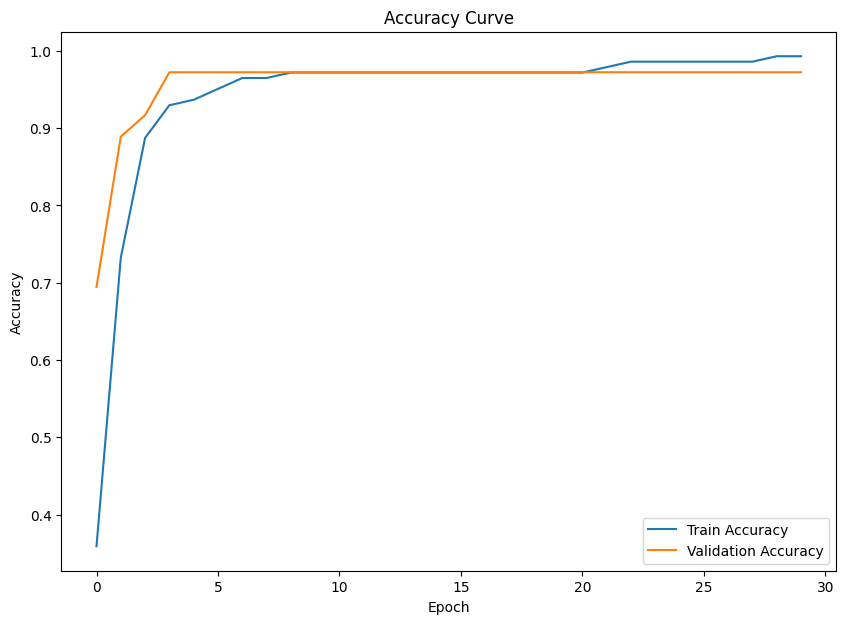

In [20]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### 📊 성능 평가 (confusion matrix & classification report)

2/2 [==============================] - 0s 1ms/step


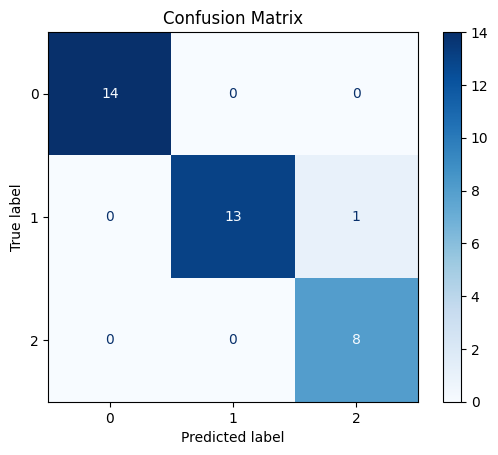

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [21]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 실험 2 예측 결과 저장
y_test_2 = y_true
y_pred_2 = y_pred_classes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

## **🧪 실험 3: Epoch = 50, Batch Size = 32**

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

N_EPOCHS = 50
BATCH_SIZE = 32

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 3)                 195       
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 0s 19ms/step - loss: 1.1688 - accuracy: 0.5282 - val_loss: 0.9744 - val_accuracy: 0.7222
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9124 - accuracy: 0.6620 - val_loss: 0.7993 - val_accuracy: 0.9167
Epoch 3/50
5/5 [=======================

### 📉 학습 곡선 확인

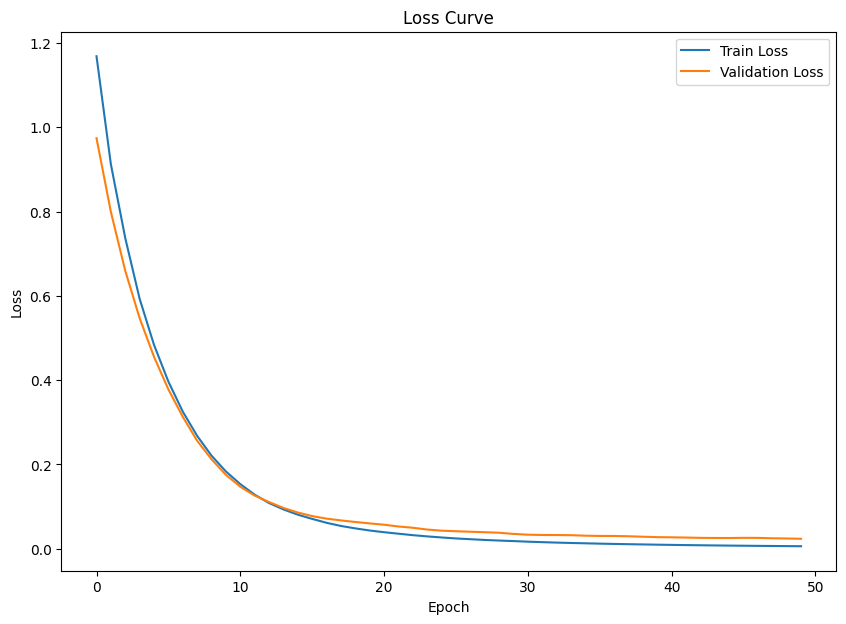

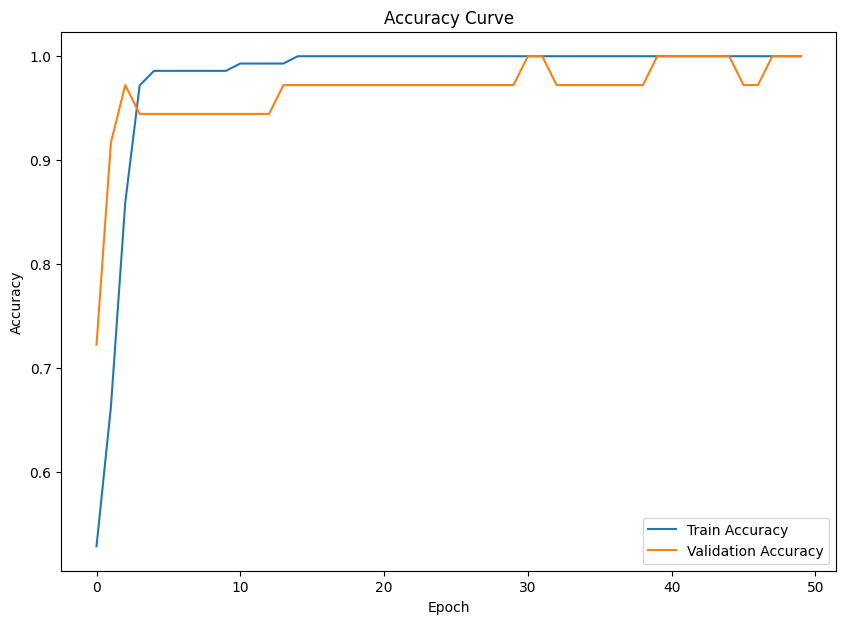

In [23]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### 📊 성능 평가 (confusion matrix & classification report)

2/2 [==============================] - 0s 2ms/step


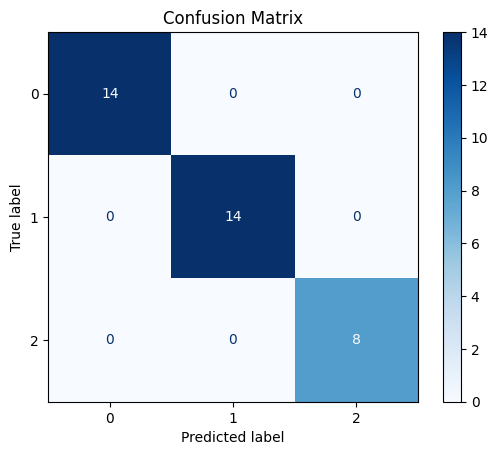

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [24]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 실험 3 예측 결과 저장
y_test_3 = y_true
y_pred_3 = y_pred_classes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

## **🧪 실험 4: 은닉층 3개, 뉴런 수 감소**

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

N_EPOCHS = 30
BATCH_SIZE = 16

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                448       
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 3)                 51        
                                                                 
Total params: 2,083
Trainable params: 2,083
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 0s 11ms/step - loss: 1.0793 - accuracy: 0.4789 - val_loss: 0.9304 - val_accuracy: 0.7778
Epoch 2/30
9/9 [=============================

### 📉 학습 곡선 확인

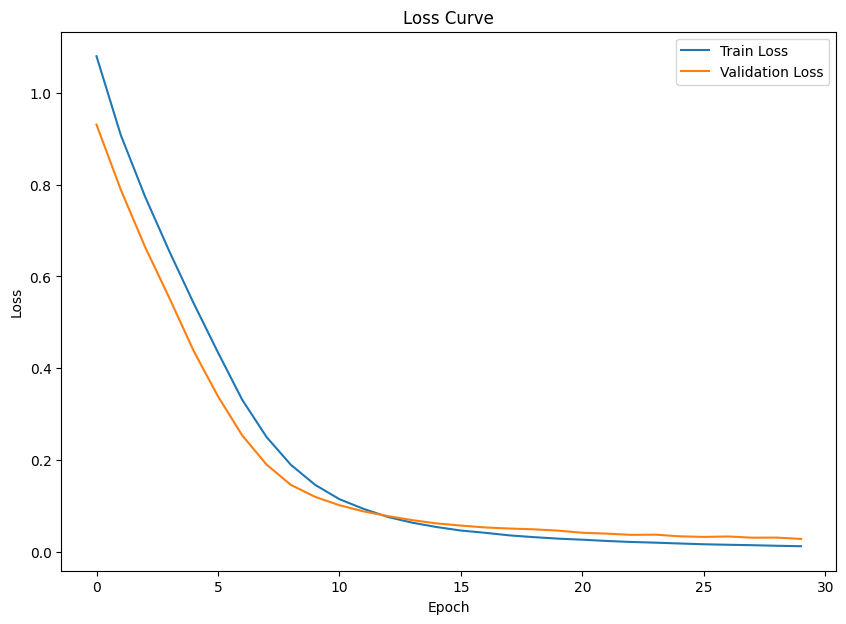

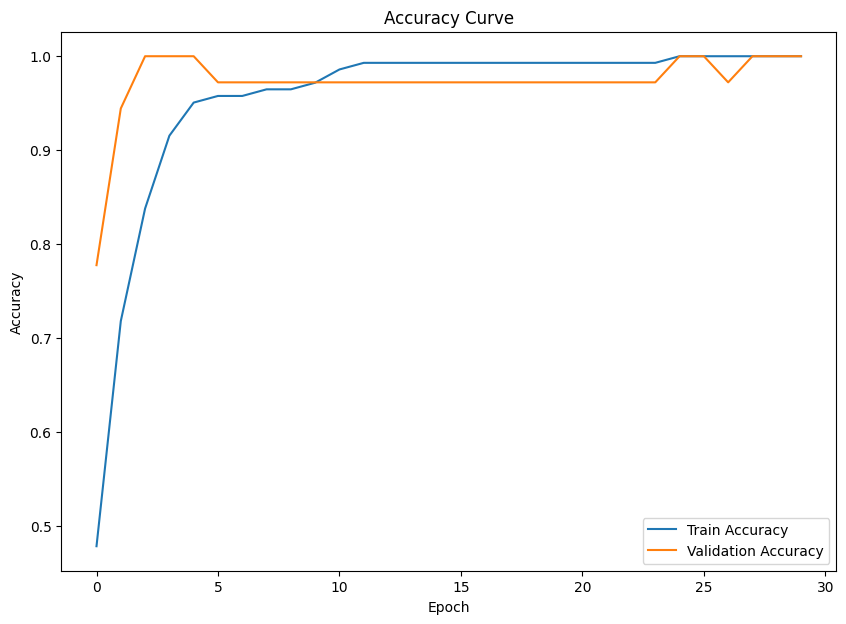

In [26]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### 📊 성능 평가 (confusion matrix & classification report)

2/2 [==============================] - 0s 2ms/step


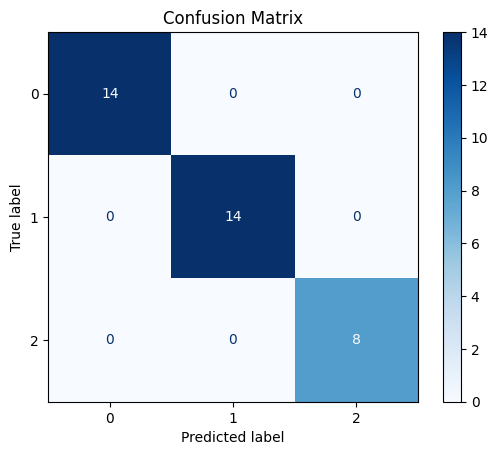

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [27]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 실험 4 예측 결과 저장
y_test_4 = y_true
y_pred_4 = y_pred_classes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

## **🧪 실험 5: Dropout + BatchNormalization**

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

N_EPOCHS = 30
BATCH_SIZE = 16

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=N_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                896       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 3)                 195       
                                                      

### 📉 학습 곡선 확인

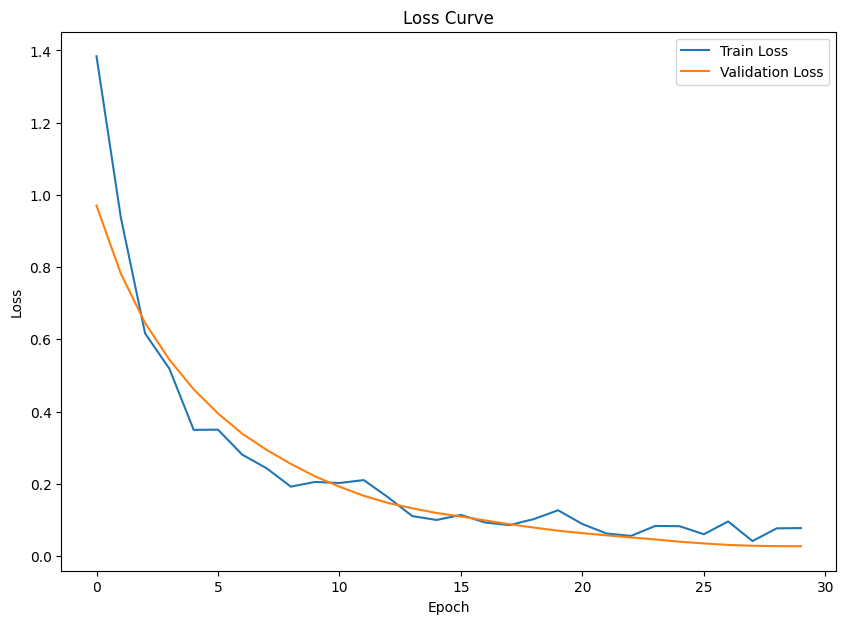

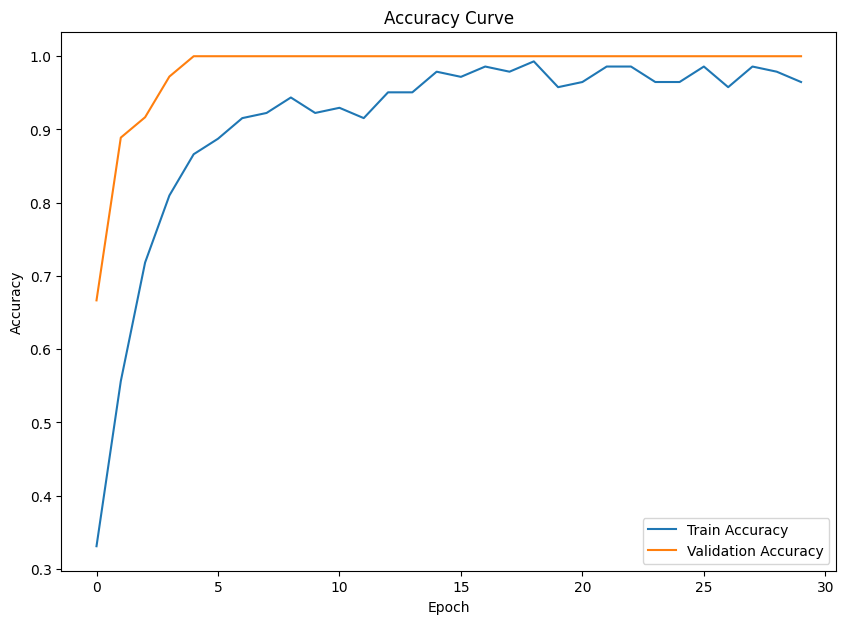

In [29]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### 📊 성능 평가 (confusion matrix & classification report)

2/2 [==============================] - 0s 999us/step


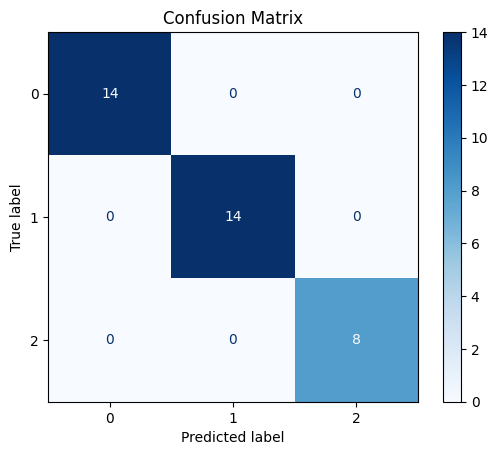

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [30]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 실험 5 예측 결과 저장
y_test_5 = y_true
y_pred_5 = y_pred_classes

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))